# Pre-Processing and Feature Selection

In this notebook, feature selection will be performed on the data in order to identify identify the variables that are most closely associated with the survival of transplant patients.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
df = pd.read_csv('data/bone_marrow.csv')

## 1. Pre-Processing'

Before getting to feature selection, let us first pre-process the data.

### A. Missing Values

In [3]:
# how many columns have missing data, and by how much?
df.isna().sum()

donor_age                      0
donor_age_below_35             0
donor_ABO                      0
donor_CMV                      2
recipient_age                  0
recipient_age_below_10         0
recipient_age_int              0
recipient_gender               0
recipient_body_mass            2
recipient_ABO                  1
recipient_rh                   2
recipient_CMV                 14
disease                        0
disease_group                  0
gender_match                   0
ABO_match                      1
CMV_status                    16
HLA_match                      0
HLA_mismatch                   0
antigen                        1
allel                          1
HLA_group_1                    0
risk_group                     0
stem_cell_source               0
tx_post_relapse                0
CD34_x1e6_per_kg               0
CD3_x1e8_per_kg                5
CD3_to_CD34_ratio              5
ANC_recovery                   5
PLT_recovery                  17
acute_GvHD

From above, we can see that 15 coolumns have missing data.

In particular, the majority of the time_to_acute_GvHD_III_IV column is missing. Since this variable is therefore not likely to be useful, let's drop it.

In [4]:
# drop time_to_acute_GvHD_III_IV
df.drop('time_to_acute_GvHD_III_IV', axis=1, inplace=True)

However, there is still a substantial amount of missing data (i.e. in the extensive_chronic_GvHD columm). We would be losing a lot of data if all of these variables were dropped.

Let's instead impute the missing data by using mean (for continuous variables) or mode (for categorical variables). 

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
# imputing missing values for categorical variables

df.donor_CMV = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['donor_CMV']])
df.recipient_ABO = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_ABO']])
df.recipient_rh = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_rh']])
df.recipient_CMV = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_CMV']])
df.ABO_match = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['ABO_match']])
df.CMV_status = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['CMV_status']])
df.antigen = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['antigen']])
df.allel = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['allel']])
df.extensive_chronic_GvHD = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['extensive_chronic_GvHD']])

In [7]:
# imputing missing values for continuous variables

df.recipient_body_mass = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['recipient_body_mass']])
df.CD3_x1e8_per_kg = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['CD3_x1e8_per_kg']])
df.CD3_to_CD34_ratio = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['CD3_to_CD34_ratio']])
df.ANC_recovery = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['ANC_recovery']])
df.PLT_recovery = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['PLT_recovery']])

In [8]:
# make sure there are no more missing data
assert df.isna().sum().sum() == 0

### B. Dealing with Skew

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

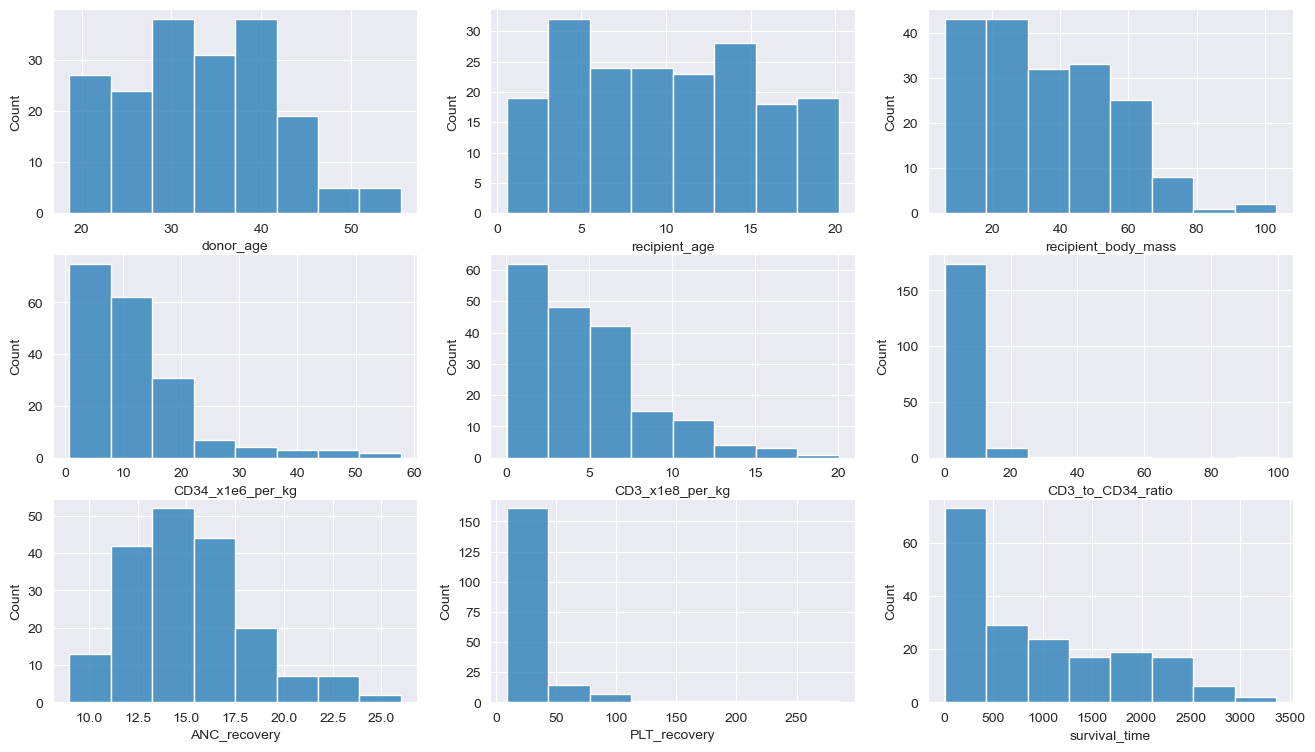

In [10]:
# plot histograms of all numerical variables

fig,ax = plt.subplots(3,3,figsize=(16,9))

sns.histplot(x=df.donor_age, bins=8, ax=ax[0,0])
sns.histplot(x=df.recipient_age, bins=8, ax=ax[0,1])
sns.histplot(x=df.recipient_body_mass, bins=8, ax=ax[0,2])
sns.histplot(x=df.CD34_x1e6_per_kg, bins=8, ax=ax[1,0])
sns.histplot(x=df.CD3_x1e8_per_kg, bins=8, ax=ax[1,1])
sns.histplot(x=df.CD3_to_CD34_ratio, bins=8, ax=ax[1,2])
sns.histplot(x=df.ANC_recovery, bins=8, ax=ax[2,0])
sns.histplot(x=df.PLT_recovery, bins=8, ax=ax[2,1])
sns.histplot(x=df.survival_time, bins=8, ax=ax[2,2]);

Here, we can see that many of the variables included in this dataset are skewed with a long right tail, including: recipient_body_mass, CD34_x1e6_per_kg, CD3_x1e8_per_kg, CD3_to_CD34_ratio, PLT_recovery, and survival_time. Since some of the models to be implemented in the next section (e.g. logistic regression) expect the data to be normally distributed, we should transform these variables.

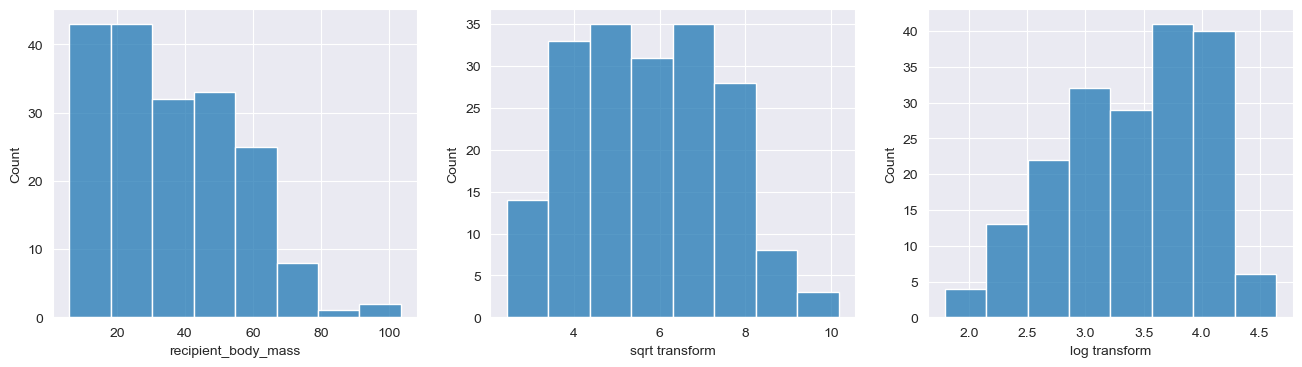

In [11]:
# recipient_body_mass

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.recipient_body_mass, bins=8, ax=ax[0]);
sns.histplot(x=df.recipient_body_mass.apply(np.sqrt), bins=8, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.recipient_body_mass.apply(np.log), bins=8, ax=ax[2]); ax[2].set_xlabel('log transform');

In [12]:
df['recipient_body_mass'] = df.recipient_body_mass.apply(np.sqrt)

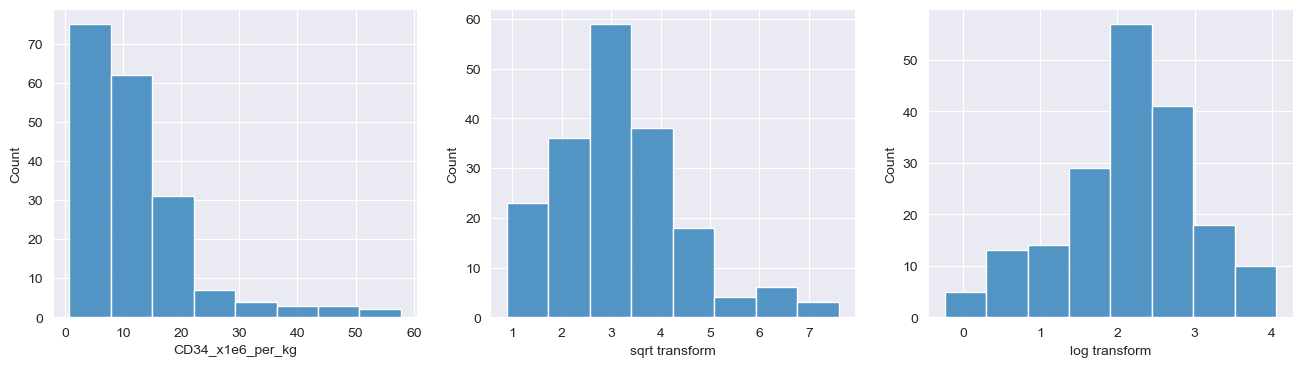

In [13]:
# CD34_x1e6_per_kg

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.CD34_x1e6_per_kg, bins=8, ax=ax[0]);
sns.histplot(x=df.CD34_x1e6_per_kg.apply(np.sqrt), bins=8, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.CD34_x1e6_per_kg.apply(np.log), bins=8, ax=ax[2]); ax[2].set_xlabel('log transform');

In [14]:
df['CD34_x1e6_per_kg'] = df.CD34_x1e6_per_kg.apply(np.sqrt)

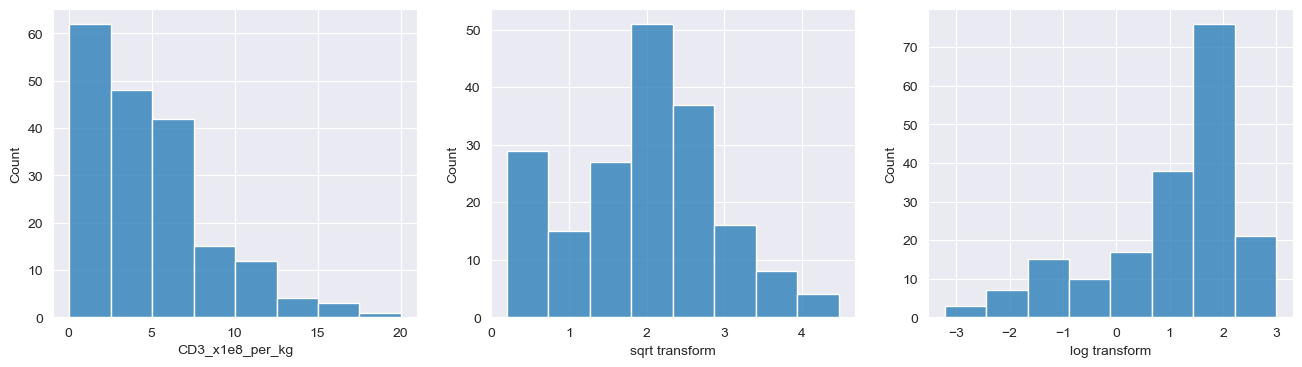

In [15]:
# CD3_x1e8_per_kg

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.CD3_x1e8_per_kg, bins=8, ax=ax[0]);
sns.histplot(x=df.CD3_x1e8_per_kg.apply(np.sqrt), bins=8, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.CD3_x1e8_per_kg.apply(np.log), bins=8, ax=ax[2]); ax[2].set_xlabel('log transform');

In [16]:
df['CD3_x1e8_per_kg'] = df.CD3_x1e8_per_kg.apply(np.sqrt)

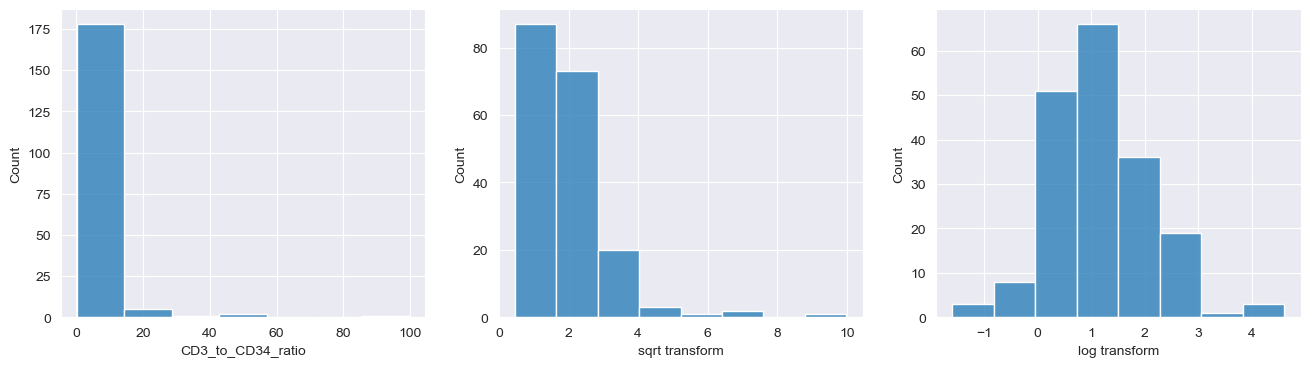

In [17]:
# CD3_to_CD34_ratio

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.CD3_to_CD34_ratio, bins=7, ax=ax[0]);
sns.histplot(x=df.CD3_to_CD34_ratio.apply(np.sqrt), bins=8, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.CD3_to_CD34_ratio.apply(np.log), bins=8, ax=ax[2]); ax[2].set_xlabel('log transform');

In [18]:
df['CD3_to_CD34_ratio'] = df.CD3_to_CD34_ratio.apply(np.log)

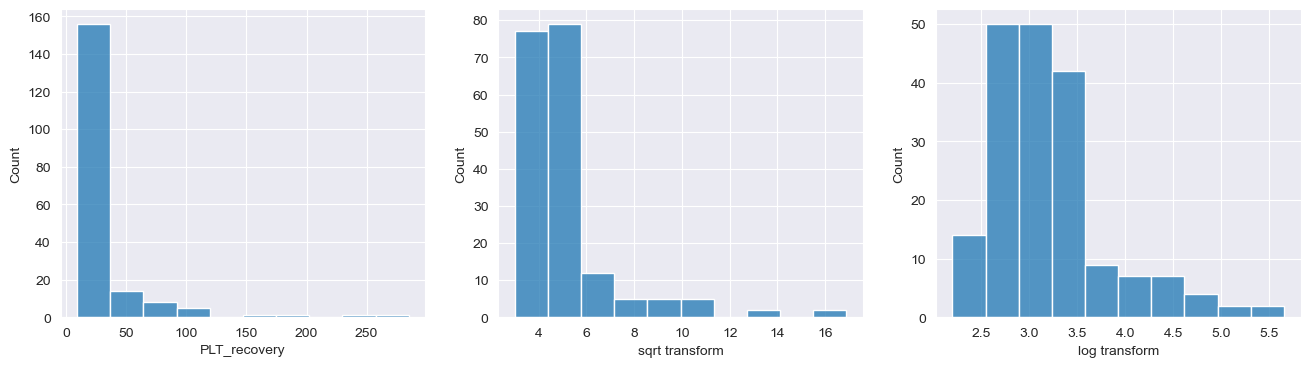

In [19]:
# PLT_recovery

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.PLT_recovery, bins=10, ax=ax[0]);
sns.histplot(x=df.PLT_recovery.apply(np.sqrt), bins=10, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.PLT_recovery.apply(np.log), bins=10, ax=ax[2]); ax[2].set_xlabel('log transform');

In [20]:
df['PLT_recovery'] = df.PLT_recovery.apply(np.log)

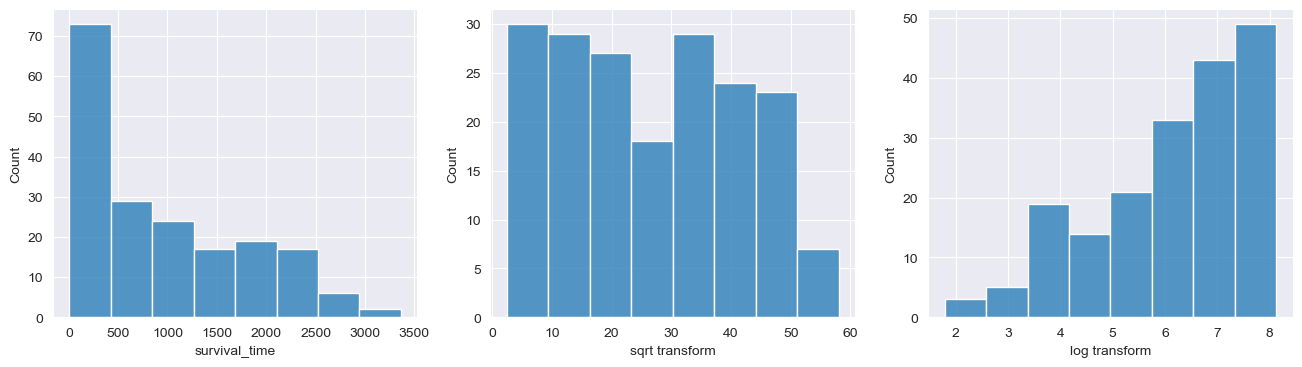

In [21]:
# survival_time

fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(x=df.survival_time, bins=8, ax=ax[0]);
sns.histplot(x=df.survival_time.apply(np.sqrt), bins=8, ax=ax[1]); ax[1].set_xlabel('sqrt transform');
sns.histplot(x=df.survival_time.apply(np.log), bins=8, ax=ax[2]); ax[2].set_xlabel('log transform');

In [22]:
df['survival_time'] = df.survival_time.apply(np.sqrt)

Now all of the necessary transformations have taken place in order to take care of the initial skew in the data. From these visualizations, we have also seen that there are no serious outliers in the data.

### C. Standardize Variables

In [23]:
from sklearn.preprocessing import StandardScaler

# need to rescale (standardize) the following variables
cols_to_scale = ['donor_age', 'recipient_age', 'recipient_body_mass',
                 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
                 'ANC_recovery', 'PLT_recovery', 'survival_time']

ss = StandardScaler()
df[cols_to_scale] = ss.fit_transform(df[cols_to_scale])

### D. Encode Categorical Variables

In [24]:
# cast CMV_status as an object type since it is a categorical variable
df['CMV_status'] = df['CMV_status'].astype(object)

# get dummies for categorical variables
df = pd.get_dummies(df, list(df.columns[df.dtypes=='object']), 
                    drop_first=True)

/Users/eubinpark/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [25]:
df.head()

,donor_age,recipient_age,recipient_body_mass,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,...,HLA_group_1_one_antigen,HLA_group_1_three_diffs,HLA_group_1_two_diffs,risk_group_low,stem_cell_source_peripheral_blood,tx_post_relapse_yes,acute_GvHD_II_III_IV_yes,acute_GvHD_III_IV_yes,extensive_chronic_GvHD_yes,relapse_yes
0,-1.289981,-0.062658,0.099054,0.0,0.0,-0.398474,0.376079,-0.946900,1.246508,1.187452,...,0,0,0,0,1,0,1,1,0,0
1,-1.227878,-1.120972,-0.739077,0.0,0.0,-0.833782,-1.424497,1.343242,0.233720,0.671081,...,0,0,0,1,0,0,1,0,0,1
2,-0.857918,-0.629612,-0.557357,0.0,0.0,-0.294272,-1.416174,1.928605,2.596891,-0.318812,...,0,0,0,1,0,0,1,0,0,1
3,0.753104,1.543712,0.801873,0.0,0.0,-0.880080,-1.709887,2.403955,2.596891,0.279070,...,0,0,0,1,0,0,1,1,0,0
4,-0.013717,-1.631231,-1.675400,2.0,1.0,3.100821,1.762560,0.231732,-0.441471,-0.892736,...,1,0,0,0,1,0,0,0,0,0


### E. Check Target Variable is Balanced

In [26]:
df.survival_status.value_counts(normalize=True)

0    0.545455
1    0.454545
Name: survival_status, dtype: float64

It is balanced! No further methods are necessary.

In [27]:
# save new df
df.to_csv('data/bone_marrow_processed.csv', index=False)

## 2. Feature Selection

Now let's move onto feature selection.

In [28]:
# split columns into features (X) & result (y)
X = df.drop('survival_status', axis = 1)
y = df['survival_status']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=.8)

### A. LASSO

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logr = LogisticRegression(C=0.3, penalty="l1", solver="liblinear")
logr.fit(X_train, y_train);

In [32]:
# which columns were kept?
X_train.columns[logr.coef_[0] != 0]

Index(['recipient_body_mass', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
       'survival_time', 'donor_age_below_35_yes', 'ABO_match_mismatched',
       'risk_group_low', 'relapse_yes'],
      dtype='object')

### B. Tree Based Model Feature Importance

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)

In [34]:
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3).head(20)

survival_time                 0.425
recipient_age                 0.044
CD34_x1e6_per_kg              0.044
CD3_x1e8_per_kg               0.044
PLT_recovery                  0.042
recipient_body_mass           0.037
donor_age                     0.034
CD3_to_CD34_ratio             0.034
ANC_recovery                  0.033
relapse_yes                   0.027
acute_GvHD_III_IV_yes         0.015
donor_age_below_35_yes        0.013
disease_lymphoma              0.012
risk_group_low                0.011
extensive_chronic_GvHD_yes    0.011
donor_ABO_A                   0.011
CMV_status_2.0                0.008
acute_GvHD_II_III_IV_yes      0.008
recipient_CMV_present         0.008
allel                         0.007
dtype: float64

In [35]:
import matplotlib.pyplot as plt

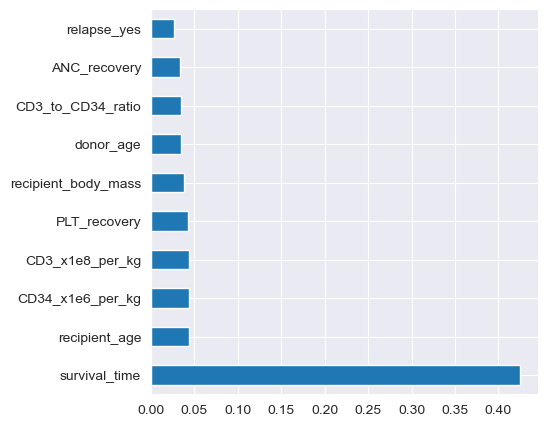

In [36]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
feature_importances.sort_values(ascending=False).head(10).plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=10);

Survival time seems to be the strongest feature by a very large margin, whilst the remaining selected variables all seem to be quite similar. Compared to the features selected by LASSO above, doses of CD34+ and CD3+ cells appear in both feature selections, indicating importance. Whether the patient relapsed also appears in both feature selections, although whether the patient developed extensive chronic GvHD has been excluded by this model.

There also seem to be features about the donors or recipients that contribute towards survival - such as the recipient's body mass, recipient age, and donor age.

### C. SelectKBest

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

# select best features
kbest = SelectKBest(score_func=f_classif, k=15).fit(X_train, y_train)
list(X.columns[kbest.get_support()])

['recipient_age',
 'recipient_body_mass',
 'CD34_x1e6_per_kg',
 'CD3_x1e8_per_kg',
 'survival_time',
 'donor_age_below_35_yes',
 'donor_ABO_A',
 'recipient_rh_plus',
 'disease_lymphoma',
 'HLA_group_1_three_diffs',
 'risk_group_low',
 'stem_cell_source_peripheral_blood',
 'acute_GvHD_III_IV_yes',
 'extensive_chronic_GvHD_yes',
 'relapse_yes']

The features selected here again highlight survival time, relapse, CD34+ cell dose, recipient age and body mass. However, the model also heavily highlights the development of GvHD as an important feature - selecting features concerning acute GvHD as well as extensive chronic GvHD.

#### Reduced Dataset

Let's save the features selected by the SelectKBest algorithm as a reduced dataset to use as input for machine learning models.

In [38]:
selected_cols = list(X.columns[kbest.get_support()])

In [39]:
df[selected_cols].to_csv('data/reduced_data.csv', index=False)